Import relevant libraries, import csv file as a DataFrame, and print the head of the resultant Dataframe (df)

In [1]:
#Import pandas, matplotlib.pyplot, numpy, and seaborn 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
#import csv file into a pandas DataFrame as 'raw_data'
raw_data = pd.read_csv('risk_factors_cervical_cancer.csv', sep=',')

Find Shape and descriptive characteristics of df

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

It appears that there is no missing data in any column, however upon closer inspection, we can see that placeholder strings are being used when there are missing values. Let's take a closer look to find out what these placeholders are, beginning by simply printing the head of raw_data

In [4]:
raw_data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


It appears that missing values are contained as "?" in the data set. Additionally, because all the other data appears to be numeric, it's reasonable to guess that all columns with datatype "object" likely contain these question mark strings. I'll have to decide what to do with these later, but first, more exploration! I need to get a sense for how much of the data has these "?" values to represent missing data.

In [5]:
# gets value counts for each column in the DataFrame

for i in range(36):
    print(raw_data.iloc[:,i].value_counts())

23    54
18    50
21    46
20    45
19    44
24    39
25    39
26    38
28    37
17    35
30    35
29    33
27    33
22    30
35    29
33    28
31    27
34    24
36    24
16    23
15    21
32    18
37    17
41    13
40    12
38     9
39     9
44     6
45     6
42     6
14     5
43     5
46     3
70     2
49     2
52     2
48     2
59     1
79     1
84     1
47     1
13     1
50     1
51     1
Name: Age, dtype: int64
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
?        26
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number of sexual partners, dtype: int64
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
?         7
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: First sexual intercourse, dtype: int64
1.0     270
2.0     240
3.0     139
4.0      74
?        56
5.0      

The following columns all contain missing data from respondents declining to answer, noted as "?" in the data set: Number of sexual partners, First sexual intercourse, Num of pregnancies, Smokes, Smokes (years), Smokes (packs/year), Hormonal Contraceptives, Hormonal Contraceptives (years), IUD, IUD (years), STDs, STDs (number), STDs:condylomatosis, STDs:cervical condylomatosis, STDs:vaginal condylomatosis, STDs:vulvo-perineal condylomatosis, STDs:syphilis, STDs:pelvic inflammatory disease, STDs:genital herpes, STDs:molluscum contagiosum, STDs:AIDS, STDs:HIV, STDs:Hepatitis B, STDs:HPV.

I notice that for most of the STD related questions, there are exactly 105 missing values, which could indicate that 105 participants in the survey declined to answer all STD questions.

Let's create a list of columns that contain these '?' values below:

In [6]:
columns_with_missing_data = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease', 'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV']

There are only 18 cancer diagnoses, 9 CIN diagnoses, 18 HPV diagnoses, and 34 'other' diagnoses. This may present a problem, as the data sets for the target variable(s) may not be large enough to split into training and test sets. Going to check with Kenneth

In [7]:
#zoom in on target variables

print(raw_data['Dx:Cancer'].value_counts())
print(raw_data['Dx:CIN'].value_counts())
print(raw_data['Dx:HPV'].value_counts())
print(raw_data['Dx'].value_counts())

0    840
1     18
Name: Dx:Cancer, dtype: int64
0    849
1      9
Name: Dx:CIN, dtype: int64
0    840
1     18
Name: Dx:HPV, dtype: int64
0    834
1     24
Name: Dx, dtype: int64


In [8]:
# replace all instances of '?' with NaN

df = raw_data.replace('?', np.NaN)

In [9]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [10]:
#check to see if our replacement worked across df
for i in range(36):
    print(df.iloc[:,i].value_counts())

23    54
18    50
21    46
20    45
19    44
24    39
25    39
26    38
28    37
17    35
30    35
29    33
27    33
22    30
35    29
33    28
31    27
34    24
36    24
16    23
15    21
32    18
37    17
41    13
40    12
38     9
39     9
44     6
45     6
42     6
14     5
43     5
46     3
70     2
49     2
52     2
48     2
59     1
79     1
84     1
47     1
13     1
50     1
51     1
Name: Age, dtype: int64
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: Number of sexual partners, dtype: int64
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
26.0      7
12.0      6
27.0      6
24.0      6
29.0      5
28.0      3
11.0      2
25.0      2
10.0      2
32.0      1
Name: First sexual intercourse, dtype: int64
1.0     270
2.0     240
3.0     139
4.0      74
5.0      35
6.0      18
0.0      16
7.0      

In [11]:
#check data types and non-null counts of the cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [12]:
#convert all columns to numeric data type float
df = df.astype(float)

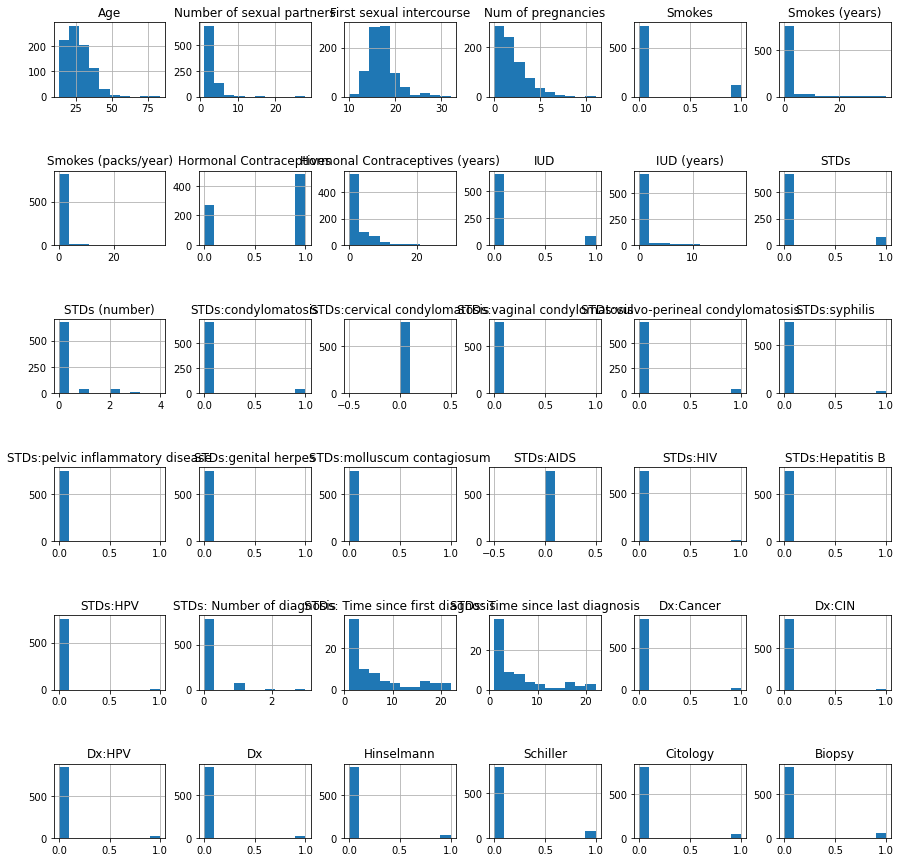

In [13]:
#plot hisograms for each column to examine the range of data and see if there are any outliers or illogical values
df.hist(figsize=(15,15))
plt.subplots_adjust(hspace=1);

All columns have realistic ranges and show no obviously outlying values.